### MAST30034: Applied Data Science Project 1
---
# Data Analysis: Modelling Average Trip Rates Over Time
#### Xavier Travers (1178369)

TODO: Modelling Average Trip Rates Over Time

In [1]:
# imports used throughout this notebook
from collections import defaultdict
from itertools import product
import os
import sys
from pyspark.sql import DataFrame, Column
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import geopandas

# add homemade helpers
sys.path.insert(1, '../../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

# path where the data files are stored
DATA_PATH = '../../data'

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/21 08:29:49 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.18.201.145 instead (on interface eth0)
22/08/21 08:29:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/21 08:29:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/21 08:29:51 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/21 08:29:51 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/08/21 08:29:51 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


### Grouped by Pick-Up Location

In [3]:
# read in the aggregated tlc by pickup data
tlc_pu_df = spark.read.parquet(f'{DATA_PATH}/curated/tlc/aggregated/yellow/by_pu')
tlc_pu_df.limit(5)

week_year,week_month,week_ending,week_index,pu_borough,population,num_trips,num_pc_trips,num_p100k_trips,avg_trip_distance
2020,4,2020-05-02,18,Manhattan,1687834.0,55248,0.032733076831015374,3273.3076831015374,2.8488097306689624
2020,5,2020-05-30,22,Queens,2395791.0,4660,0.001945077846940739,194.5077846940739,9.020862660944168
2020,4,2020-05-02,18,Staten Island,495522.0,35,7.063258543515727E-5,7.063258543515727,23.470000000000002
2020,5,2020-05-23,21,Staten Island,495522.0,89,1.796085743922570...,17.960857439225705,24.68977528089888
2020,4,2020-04-04,14,Brooklyn,2727393.0,1556,5.705081739228634E-4,57.05081739228633,5.651150385604107


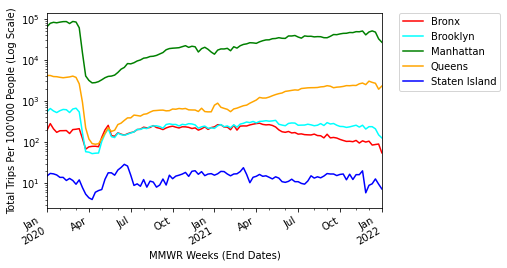

In [4]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_pu_df.toPandas(), 'num_p100k_trips',
    ylabel = 'Total Trips Per 100\'000 People', logy = True)